<a href="https://colab.research.google.com/github/AbyssWatcher07/DIFGRI30_A_25_2311532021_Stanley-Leonard-Darmali-/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

#load data
dataset_url = 'https://raw.githubusercontent.com/AbyssWatcher07/DIFGRI30_A_25_2311532021_Stanley-Leonard-Darmali-/refs/heads/main/Datasets/diabetes.csv'
df = pd.read_csv(dataset_url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Selecting Features

In [26]:
#Split data between
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
x = df[feature_cols] #Features
y = df.Outcome #Target Variable

In [70]:
print(x.shape)
print(y.shape)

(768, 9)
(768,)


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 16)

In [84]:
from sklearn.linear_model import LogisticRegression
#Call model
logreg = LogisticRegression(random_state=16)
#Fit model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[147,   0],
       [  0,  84]])

Text(0.5, 427.9555555555555, 'Predicted label')

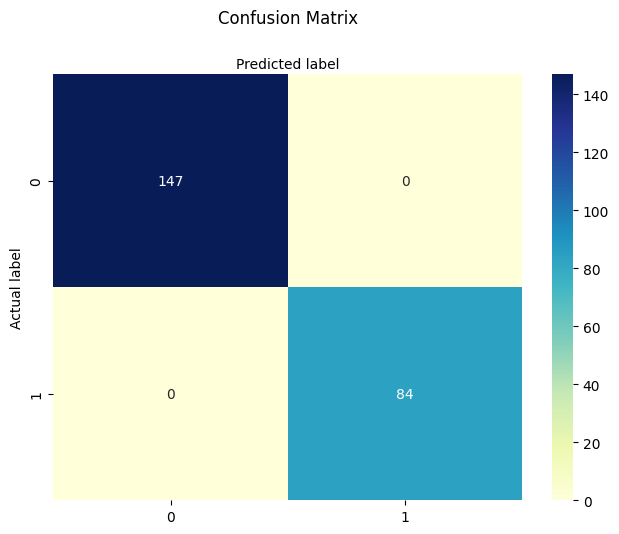

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [79]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

without diabetes       1.00      1.00      1.00       147
   with diabetes       1.00      1.00      1.00        84

        accuracy                           1.00       231
       macro avg       1.00      1.00      1.00       231
    weighted avg       1.00      1.00      1.00       231



Receiver Operating Characteristics(antara TP  dan FP Rate)

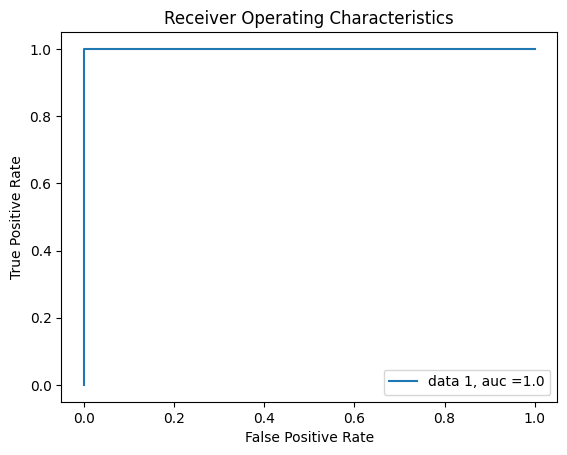

In [87]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label ="data 1, auc ="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend()
plt.show()

AUC(Area Under Curve)
AUC = 1.0 is perfect
AUC = 0.5 is worthless